<a href="https://colab.research.google.com/github/venups/MyProjects/blob/main/NLP_Practice/quora_text_classification_live_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# quora-text-classification-live-learn

Use the "Run" button to execute the code.

#######Try to sync

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# First Bag of Words NLP 

Outline:
- Download and Explore the data
- Text preprocessing technique
- Implement Bag of words model
- Train ML model for text classification
- Make predictions and submit to Kaggle

## Download and Explore the Data

Outline:
1. Download the dataset from Kaggle to Cloab
2. Explore the data using Pandas
3. Create a working sample (work with small subset of database while working on big models)

### Download the Data to Colab

In [ ]:
!ls #Shell command can be executed using exclmation mark 

kaggle.json  sample_data


In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR']='.'

In [ ]:
#!pip install --upgrade kaggle
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
# This is a shell command from the competition website

 96% 53.0M/54.9M [00:00<00:00, 129MB/s] 
100% 54.9M/54.9M [00:00<00:00, 104MB/s]


In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

 57% 9.00M/15.8M [00:00<00:00, 34.2MB/s]
100% 15.8M/15.8M [00:00<00:00, 53.6MB/s]
100% 4.09M/4.09M [00:00<00:00, 32.1MB/s]
100% 4.09M/4.09M [00:00<00:00, 32.0MB/s]


### Explore the Data Using Pandas

In [ ]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
sincere_df = raw_df[raw_df.target==0]

In [ ]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [ ]:
insincere_df = raw_df[raw_df.target==1]

In [ ]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

<Axes: >

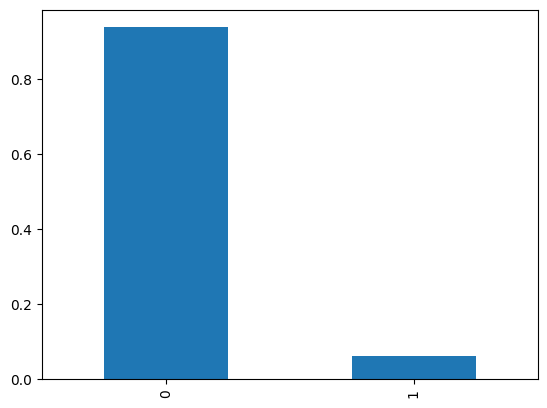

In [ ]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [ ]:
test_df = pd.read_csv(test_fname)

In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sub_df = pd.read_csv(sample_fname) 

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
sub_df.prediction.value_counts() 

0    375806
Name: prediction, dtype: int64

This is a sample submission file. Thus, all are 0. For Final submission, need to come up with predicted value for dataset and submit a csv file into Kaggle 

### Create a Working Sample

In [ ]:
SAMPLE_SIZE = 100_000 # doing this since raw data size is too big. We start with small data to run analysis at first.

In [ ]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)

In [ ]:
sample_df 

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Text Processing Techniques

Outline:
1. understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

## Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You create each document into vector counts of each word


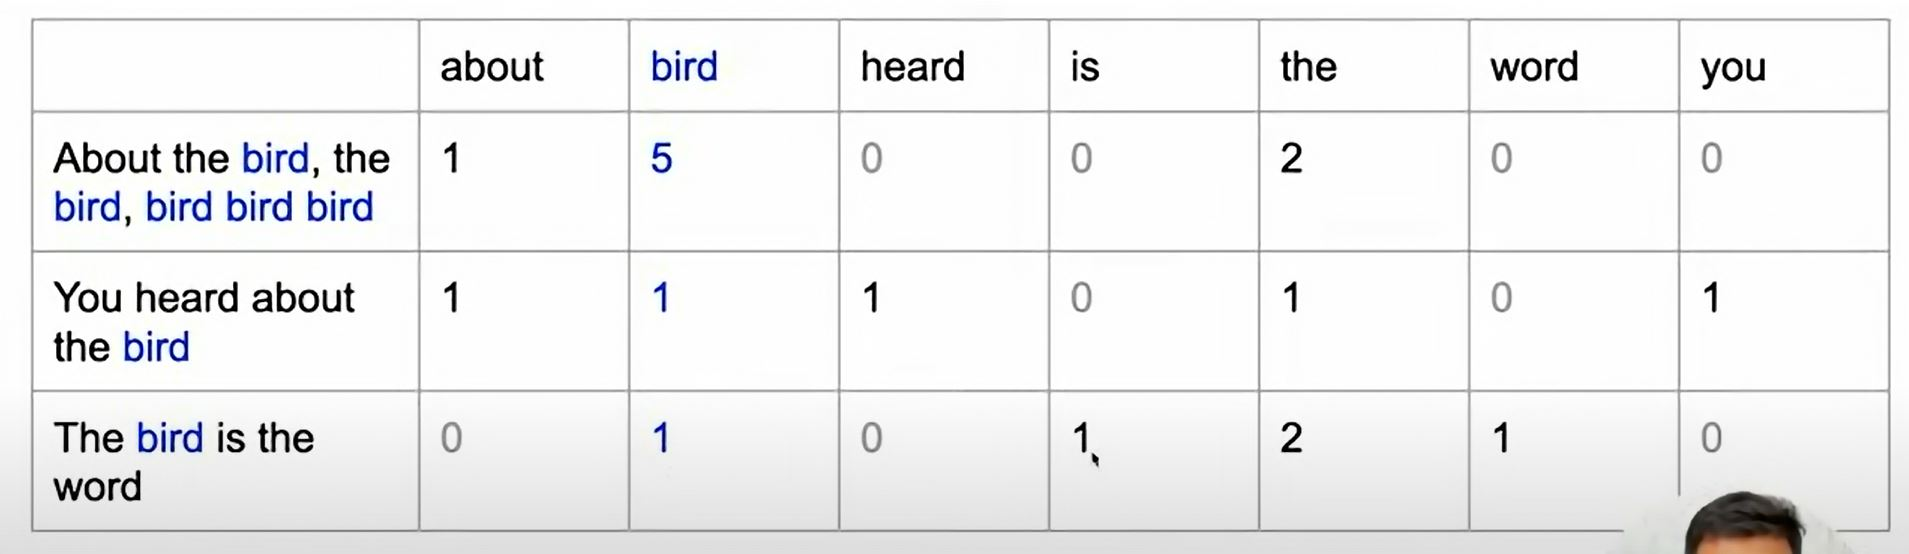

## Implement Bag of Words

## ML Models for Text Classification

## Make Predictions and Submit to Kaggle